In [1]:
#references : https://www.youtube.com/watch?v=kMJDsh0TCik&ab_channel=ManusiaSetengahChiKuadrat

In [2]:
import pandas as pd
import numpy as np
import re
import string

# Read Data

In [3]:
review_nlp = pd.read_csv('./review tokped mentah.csv')
review_nlp.head()

,content,score
0,keren,5
1,sukses untuk GOTO,5
2,Kenapa tidak bisa top up,1
3,"Saya beli hp di sini baru ini begini, reseller...",1
4,good job,5


In [4]:
review_nlp['score'].value_counts()

5    122
1     45
4     13
2     10
3     10
Name: score, dtype: int64

# Labeling

In [5]:
label = []

for index, row in review_nlp.iterrows():
    if row['score'] >=4 :
        label.append(1) #label 1 untuk rating 4 keatas
    else : 
        label.append(0) #label 0 untuk rating 3 sampai 1
        
review_nlp['label'] = label
review_nlp = review_nlp.drop(columns=['score'])

review_nlp.head()

,content,label
0,keren,1
1,sukses untuk GOTO,1
2,Kenapa tidak bisa top up,0
3,"Saya beli hp di sini baru ini begini, reseller...",0
4,good job,1


In [6]:
review_nlp['label'].value_counts()

1    135
0     65
Name: label, dtype: int64

# mengatasi data tidak imbang

In [7]:
#oversampling
s1 = review_nlp[review_nlp['label']==1].sample(130, replace=True)
s2 = review_nlp[review_nlp['label']==0].sample(130, replace=True)
review_nlp = pd.concat([s1,s2])
print(review_nlp.shape)
print(review_nlp['label'].value_counts(normalize=True))

(260, 2)
1    0.5
0    0.5
Name: label, dtype: float64


# visualisasi text

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

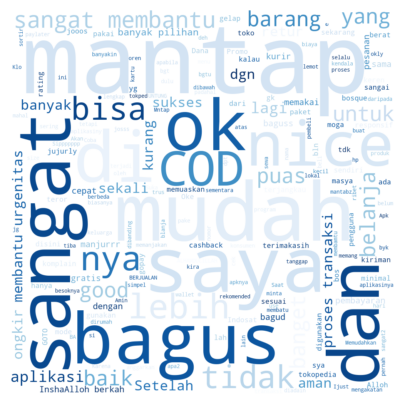

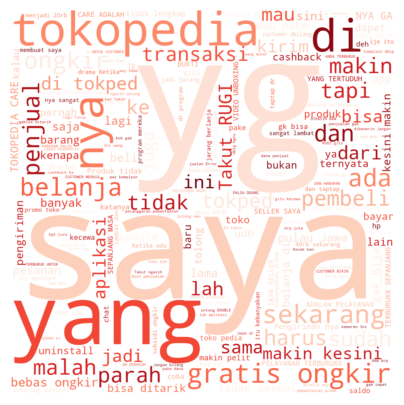

In [9]:
content_1 = review_nlp[review_nlp['label']==1]
content_1 = ' '.join(word for word in content_1['content'])
wcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_1)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

content_0 = review_nlp[review_nlp['label']==0]
content_0 = ' '.join(word for word in content_0['content'])
wcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_0)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

# Text Cleansing

In [10]:
def remove_unused(text):
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'\$\w*', '', text)
    text = re.sub(r'@[\w]*', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = text.replace('\n', ' ')
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'[^\x00-\x7f]', r'', text)
    text = re.sub(r'[^\w]', ' ', text)
    space = ['    ', '   ', '  ']
    for i in space:
        text = text.replace(i, ' ')
    text = text.lower().strip()
#     text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [11]:
review_nlp['clean text'] = review_nlp['content'].apply(lambda x: remove_unused(x))
review_nlp = review_nlp[['clean text', 'label']]

In [12]:
review_nlp

,clean text,label
86,ok banget,1
98,josss,1
117,sangat membamtu konsumen dengan program ini,1
92,mantap,1
33,baguss,1
...,...,...
153,beda sama sebelah fitur cod banyak gak bisa nya,0
96,bos kenapa kebijakan gratis ongkir nya berubah...,0
39,terima kasih monyet,0
103,turunin bintang nya dulu deh kok makin kesini ...,0


In [13]:
#import stemmer
import nltk
from nltk.stem.snowball import SnowballStemmer
#the stemmer requires a language parameter
stemmer = SnowballStemmer(language='english')
#import stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer_id = StemmerFactory().create_stemmer()

In [14]:
#import stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
stopworder = set(stopwords.words('indonesian', 'english'))
stopword = StopWordRemoverFactory().create_stop_word_remover()
from nltk.tokenize import word_tokenize
tokenizer = word_tokenize

In [15]:
def cleansing(data):
    text = stemmer_id.stem(data)
    text = stopword.remove(text)
    text = tokenizer(text)
    text = [stemmer.stem(t) for t in text] #.split()]#stemmer inggris
    text = [word for word in text if word not in stopworder]
    text = ' '.join(word for word in text)
    return text

In [16]:
#contoh
tes ='jika novel berteriak minta keadilan bagaimana'
cleaned = cleansing(tes)
print(cleaned)

novel teriak adil


In [17]:
data_clean = review_nlp['clean text'].apply(cleansing)

In [18]:
data_clean

86                                             ok banget
98                                                 josss
117                            membamtu konsumen program
92                                                mantap
33                                                baguss
                             ...                        
153                             beda belah fitur cod gak
96     bos bijak grati ongkir ubah belanja minim udah...
39                                   terima kasih monyet
103        turunin bintang deh kesini pelit grati ongkir
69      tolong subsidi ongkir yg rb rb jarang lanja tokp
Name: clean text, Length: 260, dtype: object

In [19]:
review_nlp['text'] = data_clean
data_nlp = review_nlp[['text', 'label']]

In [20]:
data_nlp.head()

,text,label
86,ok banget,1
98,josss,1
117,membamtu konsumen program,1
92,mantap,1
33,baguss,1


# Feature Enginering TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer_tfidf = TfidfVectorizer()

In [23]:
chat = ['halo apa kabar', 
        'selamat bulan puasa',
        'lagi dimana',
        'how dinner eat'
       ]
chet = ['haha apa kabar', 
        'selam bulan puasa',
        'lagi mana',
        'horse eat'
       ]

In [24]:
vectorized_tfidf = vectorizer_tfidf.fit_transform(chat)

In [25]:
vectorized_tfidf.shape

(4, 11)

In [26]:
#contoh feature
print(vectorized_tfidf.todense())

[[0.57735027 0.         0.         0.         0.         0.57735027
  0.         0.57735027 0.         0.         0.        ]
 [0.         0.57735027 0.         0.         0.         0.
  0.         0.         0.         0.57735027 0.57735027]
 [0.         0.         0.70710678 0.         0.         0.
  0.         0.         0.70710678 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.         0.         0.        ]]


In [27]:
vectorizer_tfidf.get_feature_names()

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['apa',
 'bulan',
 'dimana',
 'dinner',
 'eat',
 'halo',
 'how',
 'kabar',
 'lagi',
 'puasa',
 'selamat']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(review_nlp['text'], review_nlp['label'], test_size=0.1,
                                                  stratify = review_nlp['label'], random_state=30)

In [29]:
X_train = vectorizer_tfidf.fit_transform(X_train) 
X_test = vectorizer_tfidf.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(234, 513)
(26, 513)


# Modeling

In [30]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear')

In [31]:
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
pred = model_svm.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
accuracy = accuracy_score(y_test, pred)
print(f'accuracy : {accuracy}')

accuracy : 0.9615384615384616


In [35]:
clf_r = classification_report(y_test, pred)
print(clf_r)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


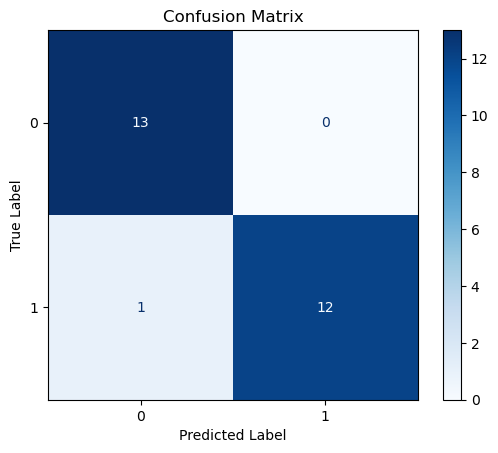

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'black'
matrix = plot_confusion_matrix(model_svm, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

# Simpan Model

In [38]:
import pickle

In [39]:
pickle.dump(model_svm,open('model_svm_tfidf.pkl', 'wb'))

# Prediksi

In [40]:
label = {1 : 'good', 0 : 'bad'}
print(label)

{1: 'good', 0: 'bad'}


In [41]:
text_good = 'sangat bagus, aplikasi mudah membantu, suka berguna'
text_bad = 'susah jelek, tidak berguna, buruk kecewa, sulit dipakai lambat banyak iklan'

# Cleansing

In [42]:
text_clean = remove_unused(text_bad)
print(text_clean)
text_clean = cleansing(text_clean)
print(text_clean)

susah jelek tidak berguna buruk kecewa sulit dipakai lambat banyak iklan
susah jelek buruk kecewa sulit pakai lambat iklan


# to numeric

In [43]:
pred_text = vectorizer_tfidf.transform([text_clean])
print(pred_text.shape)
print(pred_text.todense())

(1, 513)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.34707384 0.         0.         0.         0.
  0.         0.         0.     

In [44]:
prediksi = model_svm.predict(pred_text)
i = np.max(prediksi)
lab = label[i]
hasil = (f'merupakan text : {lab}')
print(hasil)

merupakan text : bad
